In [123]:
from google.colab import files
upload = files.upload()

Saving teste_pebolim.jpeg to teste_pebolim.jpeg


In [71]:
import numpy as np
import cv2
import glob
from matplotlib import pyplot as plt

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob('*.jpg')
images = images
print(images)

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

        corners2 = cv2.cornerSubPix(gray,dist,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)
        
        ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

        # print(rett, mtx, dist, rvecs, tvecs)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (7,6), corners2,ret)
        plt.imshow(img)
        plt.show()
        cv2.waitKey(500)

cv2.destroyAllWindows()

['pebolim.jpg', 'pebolim2.jpg']


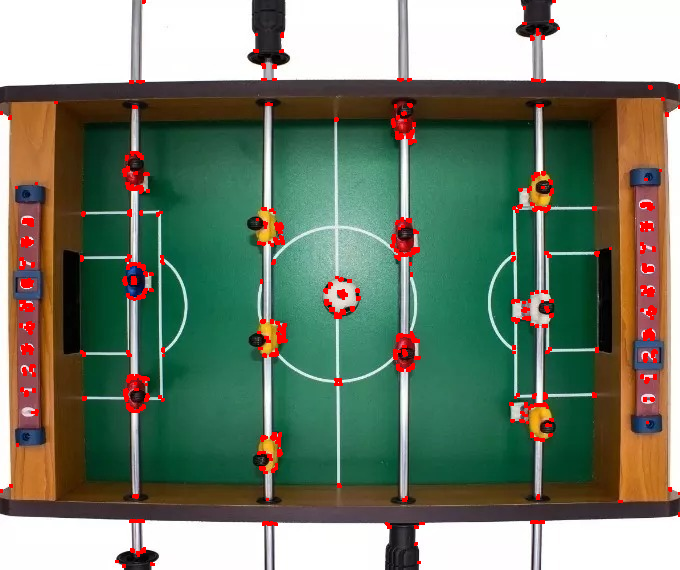

In [5]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

filename = 'pebolim.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

cv2_imshow(img)
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

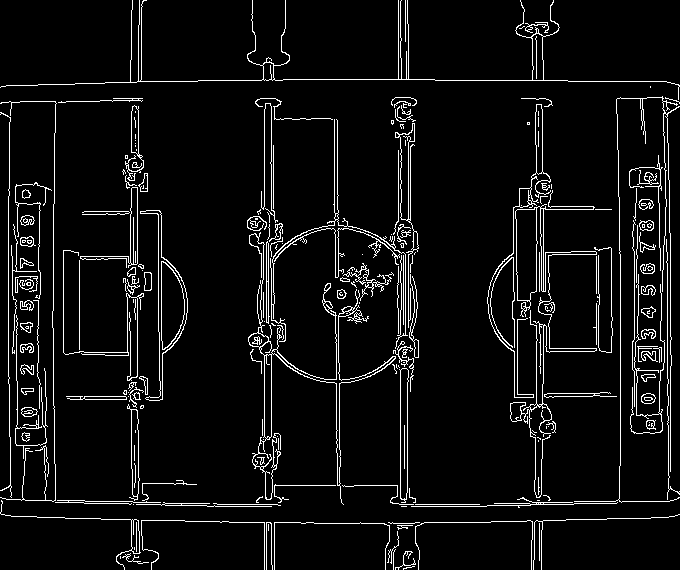

Number of Contours found = 194


In [81]:
import cv2 
import numpy as np 
  
# Let's load a simple image with 3 black squares 
image = cv2.imread('pebolim.jpg') 
cv2.waitKey(0) 
  
# Grayscale 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
  
# Find Canny edges 
edged = cv2.Canny(gray, 30, 200) 
cv2.waitKey(0) 
  
# Finding Contours 
# Use a copy of the image e.g. edged.copy() 
# since findContours alters the image 
contours, hierarchy = cv2.findContours(edged,  
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
  
cv2_imshow(edged) 
cv2.waitKey(0) 
  
print("Number of Contours found = " + str(len(contours))) 
  
# Draw all contours 
# -1 signifies drawing all contours 
cv2.drawContours(image, contours, -1, (0, 255, 0), 3) 
  
cv2.waitKey(0) 
cv2.destroyAllWindows() 

(274, 522)
(274, 569)
(384, 569)
(388, 525)


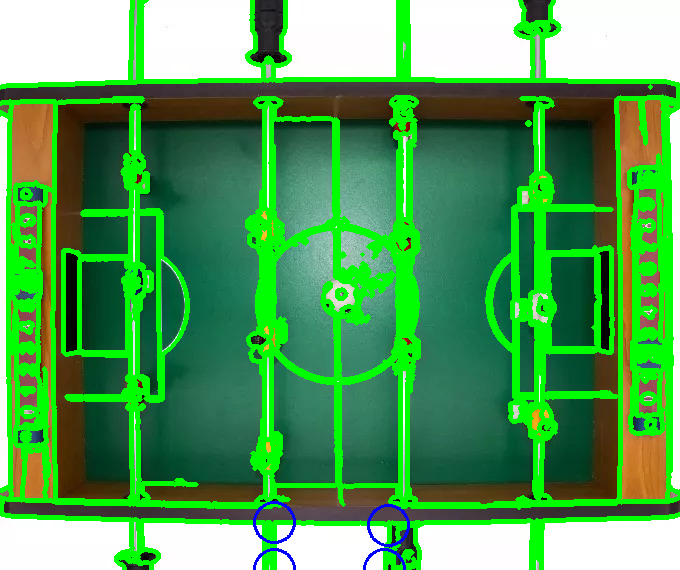

In [ ]:
import cv2
import numpy as np

img = cv2.imread('pebolim.jpg',0)
ret,thresh = cv2.threshold(img,127,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)

cnt = contours[0]
M = cv2.moments(cnt)

epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)

# Radius of circle
radius = 20
  
# Blue color in BGR
color = (255, 0, 0)
  
# Line thickness of 2 px
thickness = 2
  
# Using cv2.circle() method
# Draw a circle with blue line borders of thickness of 2 px
  
# Using cv2.rectangle() method 
# Draw a rectangle with blue line borders of thickness of 2 px 
# image = cv2.rectangle(img, start_point, end_point, color, thickness)
for i in approx:
  print((i[0][0], i[0][1]))
  image = cv2.circle(image, (i[0][0], i[0][1]), radius, color, thickness)

cv2_imshow(image)

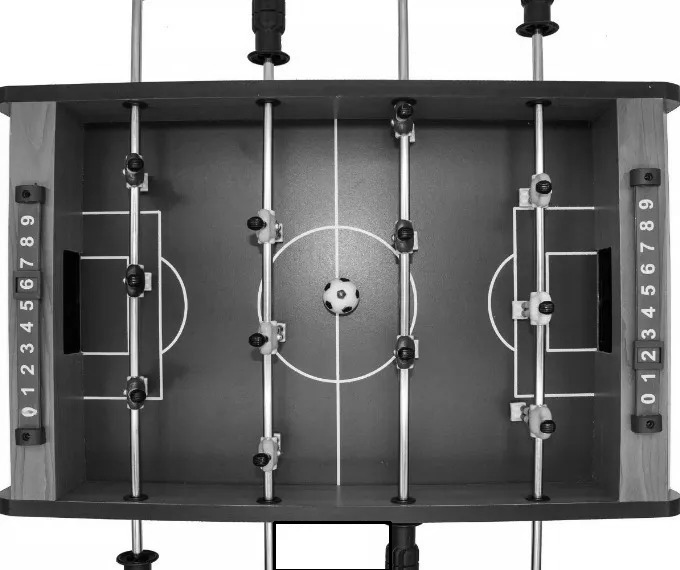

In [ ]:
x,y,w,h = cv2.boundingRect(cnt)
imaag = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
cv2_imshow(imaag)

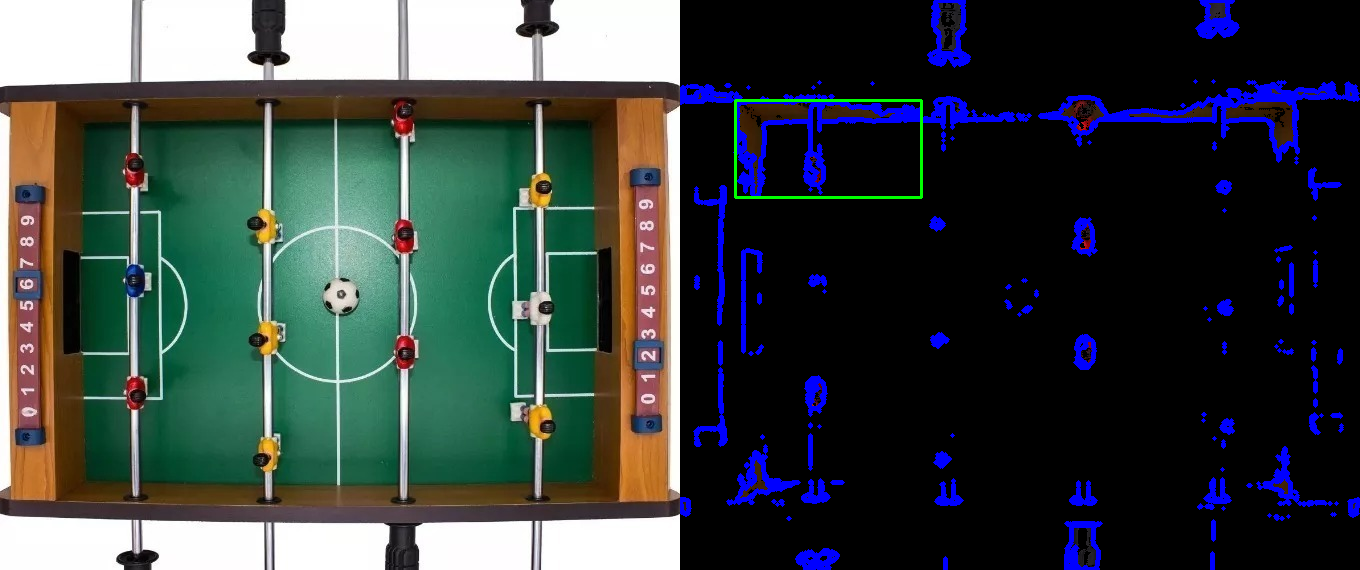

-1

In [75]:
import numpy as np
from google.colab.patches import cv2_imshow
import cv2

# load the image
image = cv2.imread("pebolim.jpg", 1)
# red color boundaries [B, G, R]
lower = [1, 0, 20]
upper = [60, 40, 200]
# create NumPy arrays from the boundaries
lower = np.array(lower, dtype="uint8")
upper = np.array(upper, dtype="uint8")
# find the colors within the specified boundaries and apply
# the mask
mask = cv2.inRange(image, lower, upper)
output = cv2.bitwise_and(image, image, mask=mask)
ret,thresh = cv2.threshold(mask, 40, 255, 0)
contours,hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
if len(contours) != 0:
    # draw in blue the contours that were founded
    cv2.drawContours(output, contours, -1, 255, 3)
    #find the biggest area
    c = max(contours, key = cv2.contourArea)
    x,y,w,h = cv2.boundingRect(c)
    # draw the book contour (in green)
    cv2.rectangle(output,(x,y),(x+w,y+h),(0,255,0),2)
# show the images
cv2_imshow(np.hstack([image, output]))
cv2.waitKey(0)

number of countours detected before filtering 71 -> 


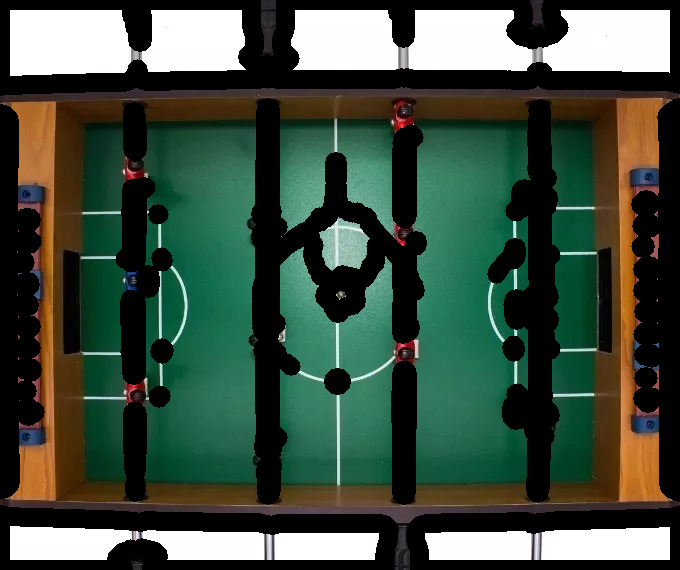

In [69]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

im = cv2.imread('pebolim.jpg')
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
imgray = cv2.medianBlur(imgray, ksize=7)

ret, thresh = cv2.threshold(imgray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

print ("number of countours detected before filtering %d -> "%len(contours))
new = np.zeros(imgray.shape)
mask = np.zeros(im.shape[:2], dtype=im.dtype)
for i in range(len(contours)):
  new = cv2.drawContours(im,contours,i,(0,0,0),18)

cv2_imshow(new)


number of countours detected before filtering 71 -> 


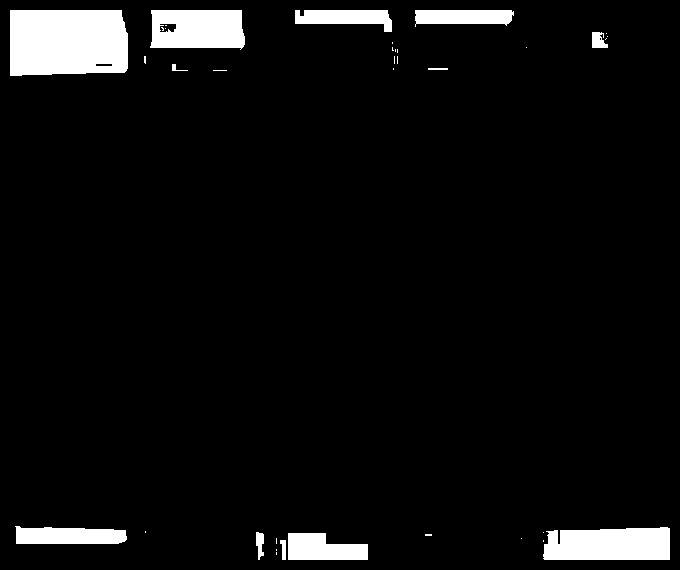

In [72]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

im = cv2.imread('pebolim.jpg')
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
imgray = cv2.medianBlur(imgray, ksize=7)

ret, thresh = cv2.threshold(imgray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

print ("number of countours detected before filtering %d -> "%len(contours))
new = np.zeros(imgray.shape)
mask = np.zeros(im.shape[:2], dtype=im.dtype)
for i in range(len(contours)):
  new = cv2.drawContours(im,contours,i,(0,0,0),18)

# lower = np.array([0,0,0])  #-- Lower range --
# upper = np.array([70,70,70])  #-- Upper range --
lower = np.array([255,255,255])
upper = np.array([255,255,255])

mask = cv2.inRange(new, lower, upper)
res = cv2.bitwise_and(new, new, mask= mask)

cv2_imshow(res)

# print ("number of countours detected before filtering %d -> "%len(contours))
# new = np.zeros(imgray.shape)
# mask = np.zeros(im.shape[:2], dtype=im.dtype)
# for i in range(len(contours)):
#   print(contours[i])
#   new = cv2.drawContours(im,contours,i,(0,0,0),18)

# cv2_imshow(new)

# mask = np.zeros(imgray.shape,np.uint8)
# cv2.drawContours(mask,[contours[len(contours)-1]],0,(0,0,255),-1)
# cv2_imshow(mask)
# pixelpoints = cv2.findNonZero(mask)


# print(len(pixelpoints))
# print("type of pixelpoints is %s" %type(pixelpoints))

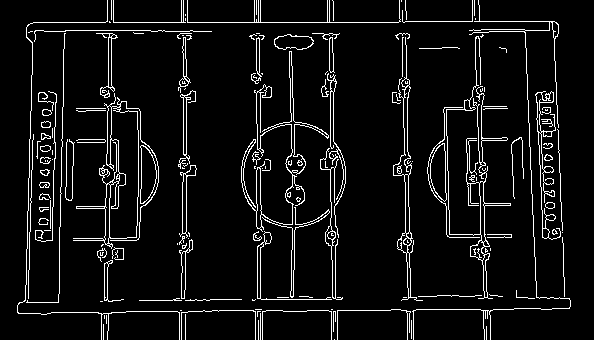

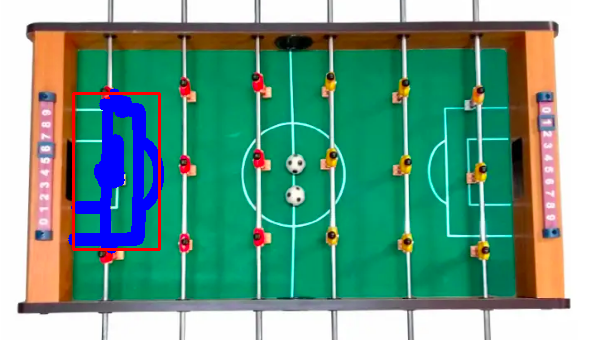

In [29]:
import cv2
from google.colab.patches import cv2_imshow


image= cv2.imread('pebolim_teste.png', 1)
original_image= image

gray= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

edges= cv2.Canny(gray, 100, 200)

cv2_imshow(edges)

contours, hierarchy= cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


cv2.destroyAllWindows()


def get_contour_areas(contours):

    all_areas= []

    for cnt in contours:
        area= cv2.contourArea(cnt)
        all_areas.append(area)

    return all_areas


sorted_contours= sorted(contours, key=cv2.contourArea, reverse= True)


largest_item= sorted_contours[0]

cv2.drawContours(original_image, largest_item, -1, (255,0,0),10)
(x,y,w,h) = cv2.boundingRect(largest_item)
cv2.rectangle(original_image, (x,y), (x+w,y+h), (0,0,255), 2)
cv2.waitKey(0)
cv2_imshow(original_image)


cv2.waitKey(0)
cv2.destroyAllWindows()


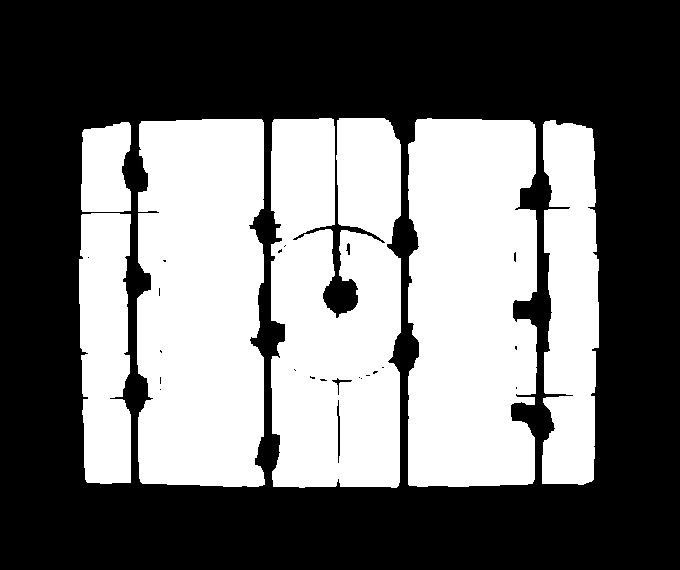

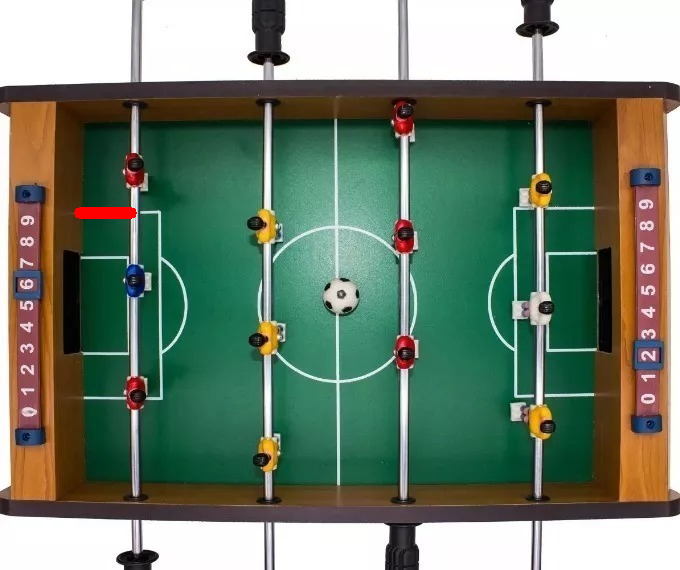

81 122


In [98]:
import cv2 as cv
import numpy as np

# Take each frame
frame = cv2.imread('pebolim.jpg')
# Convert BGR to HSV
hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
# define range of blue color in HSV
low_green = np.array([28, 43, 21])
high_green = np.array([102, 255, 255])
# Threshold the HSV image to get only blue colors
mask = cv.inRange(hsv, low_green, high_green)
mask = cv2.erode(mask, None, iterations=2)
mask = cv2.dilate(mask, None, iterations=2)
# Bitwise-AND mask and original image
res = cv.bitwise_and(frame,frame, mask= mask)
cv2_imshow(mask)
# cv2_imshow(res)

# edges= cv2.Canny(mask, 100, 200)

# cv2_imshow(edges)

ret, thresh = cv2.threshold(mask, 255, 255, 255)
# cv2_imshow(thresh)

contours, hierarchy= cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

sorted_contours= sorted(contours, key=cv2.contourArea, reverse= True)

# the two least areas countours in hsv conversion 
(x, y, w, h) = cv2.boundingRect(sorted_contours[-1])
(x2,y2,w2,h2) = cv2.boundingRect(sorted_contours[-2])

if x < x2:
  cv2.rectangle(frame, (x, y), (x2 + w2, y2 + h2), (0,0,255), 10)
else:
  cv2.rectangle(frame, (x2,y2), (x + w, y + h), (0,0,255), 10)

cv2_imshow(frame)
print(x, y)

    
cv.destroyAllWindows()

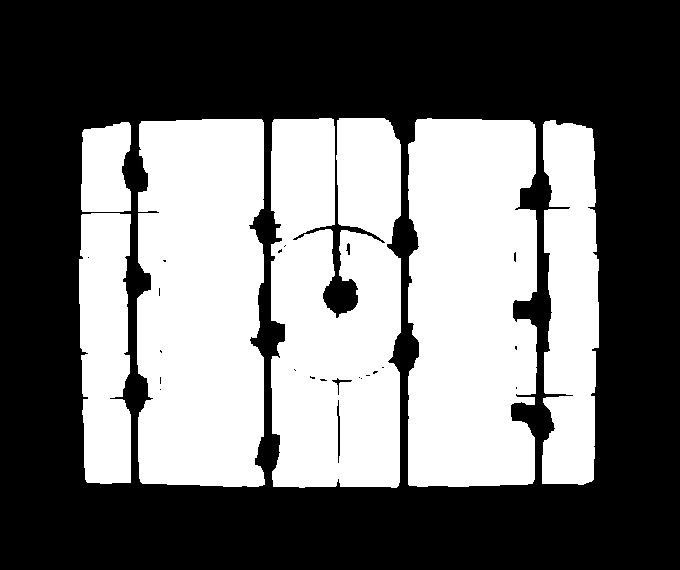

(79, 213, 52, 271)
(81, 122, 50, 90)
(542, 120, 57, 365)
(137, 119, 128, 368)
(408, 118, 129, 369)
(271, 118, 130, 370)


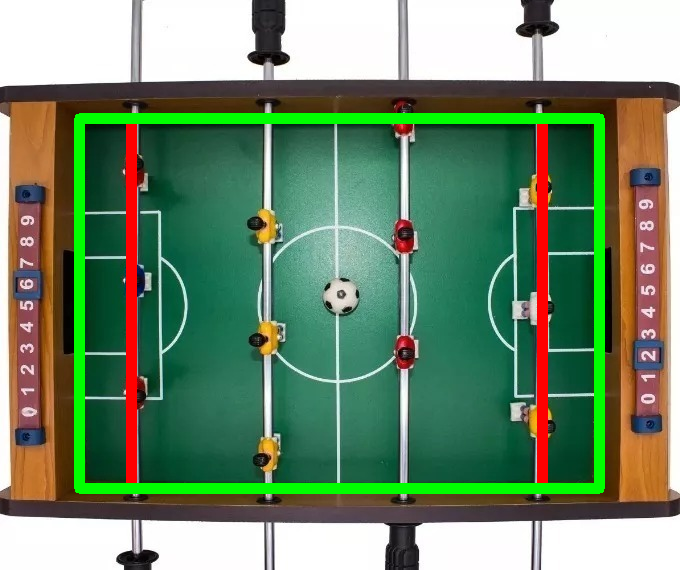

In [125]:
import cv2 as cv
import numpy as np

# Take each frame
frame = cv2.imread('pebolim.jpg')
# Convert BGR to HSV
hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
# define range of blue color in HSV
low_green = np.array([28, 43, 21])
high_green = np.array([102, 255, 255])
# Threshold the HSV image to get only blue colors
mask = cv.inRange(hsv, low_green, high_green)
mask = cv2.erode(mask, None, iterations=2)
mask = cv2.dilate(mask, None, iterations=2)
# Bitwise-AND mask and original image
res = cv.bitwise_and(frame,frame, mask= mask)
cv2_imshow(mask)
# cv2_imshow(res)

# edges= cv2.Canny(mask, 100, 200)

# cv2_imshow(edges)

ret, thresh = cv2.threshold(mask, 255, 255, 255)
# cv2_imshow(thresh)

contours, hierarchy= cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

sorted_contours= sorted(contours, key=cv2.contourArea, reverse= True)

highest_height = 0
highest_height_padding = 0
least_height = 99999999
set_contours = []
for contour in contours:
  (x2,y2,w2,h2) = cv2.boundingRect(contour)
  print((x2,y2,w2,h2))
  if y2 < least_height:
    least_height = y2 
  if h2 > highest_height_padding:
    highest_height_padding = h2
  if y2 + h2 > highest_height:
    highest_height = y2 + h2
  if highest_height - (y2 + h2) < 10:
    set_contours.append((x2,y2,w2,h2))

# filter_contours = []
# for (x2,y2,w2,h2) in set_contours:
#   print(x2,y2,w2,h2)
#   filter_contours.append((x2,least_height,w2,highest_height_padding))

# for (x2,y2,w2,h2) in filter_contours:
#   cv2.rectangle(frame, (x2, least_height), (x2 + w2, least_height + highest_height_padding), (0,0,255), 10)

(x,y,w,h) = set_contours[0]
(x2,y2,w2,h2) = set_contours[1]

cv2.rectangle(frame, (x, least_height), (x + w, least_height + highest_height_padding), (0,0,255), 10)
cv2.rectangle(frame, (x2, least_height), (x2 + w2, least_height + highest_height_padding), (0,0,255), 10)
cv2.rectangle(frame, (x, least_height), (x2 + w2, least_height + highest_height_padding), (0,255,0), 10)

cv2_imshow(frame)
    
cv.destroyAllWindows()

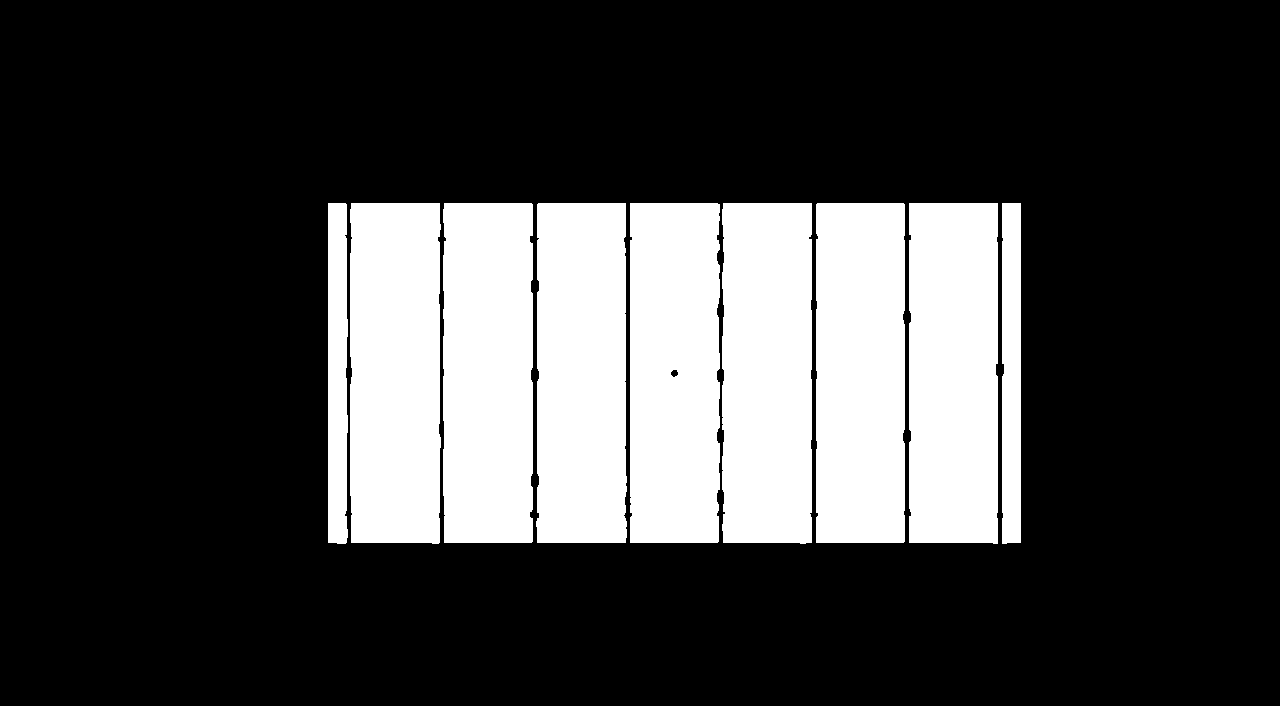

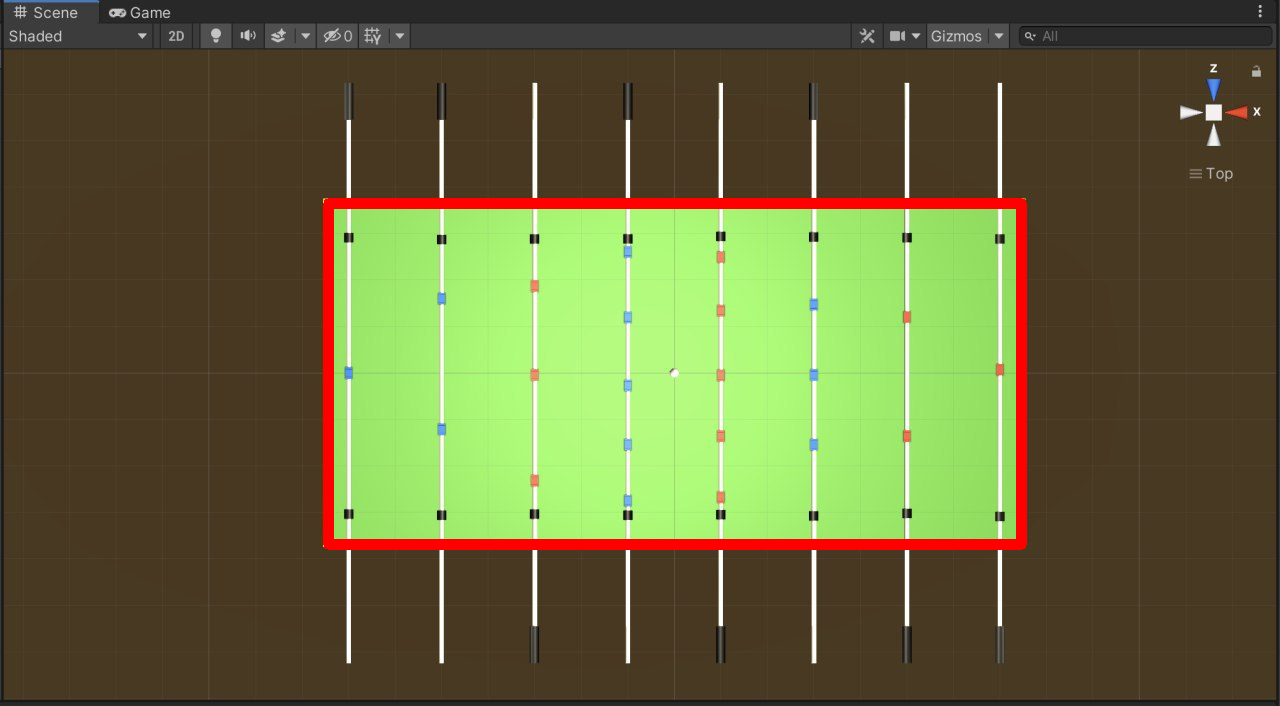

1002 203


In [130]:
import cv2 as cv
import numpy as np

# Take each frame
frame = cv2.imread('teste_pebolim.jpeg')
# Convert BGR to HSV
hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
# define range of blue color in HSV
low_green = np.array([28, 43, 21])
high_green = np.array([102, 255, 255])
# Threshold the HSV image to get only blue colors
mask = cv.inRange(hsv, low_green, high_green)
mask = cv2.erode(mask, None, iterations=2)
mask = cv2.dilate(mask, None, iterations=2)
# Bitwise-AND mask and original image
res = cv.bitwise_and(frame,frame, mask= mask)
cv2_imshow(mask)
# cv2_imshow(res)

# edges= cv2.Canny(mask, 100, 200)

# cv2_imshow(edges)

ret, thresh = cv2.threshold(mask, 255, 255, 255)
# cv2_imshow(thresh)

contours, hierarchy= cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

sorted_contours= sorted(contours, key=cv2.contourArea, reverse= True)

# the two least areas countours in hsv conversion 
(x, y, w, h) = cv2.boundingRect(sorted_contours[-1])
(x2,y2,w2,h2) = cv2.boundingRect(sorted_contours[-2])

if x < x2:
  cv2.rectangle(frame, (x, y), (x2 + w2, y2 + h2), (0,0,255), 10)
else:
  cv2.rectangle(frame, (x2,y2), (x + w, y + h), (0,0,255), 10)

cv2_imshow(frame)
print(x, y)

    
cv.destroyAllWindows()